In [16]:
##import modules

import pandas as pd
# Data processing
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

##Load dataset
train= pd.read_csv('/content/gdrive/My Drive/Santander/train.csv')
test= pd.read_csv('/content/gdrive/My Drive/Santander/test.csv')

#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [13]:
## Basic data exploration
print(train.shape)
print(train.head())
print(test.shape)
print(test.head())
## train has 202 columns including 200 features and ID_code, target
## test has 201 columns including 200 features and ID_code

(200000, 202)
   ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]
(200000, 201)
  ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 col

0    179902
1     20098
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


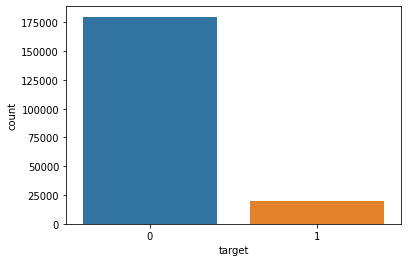

In [14]:
print(train['target'].value_counts())
sns.countplot(train['target'])

## Heavy imbalance: 89.95% class 0 and 10.05% class 1 (transaction)

In [ ]:
## Missing Values
print(np.sum(np.sum(pd.isnull(train))))
print(np.sum(np.sum(pd.isnull(test))))
## No missing data in both training and testing dataset

0
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


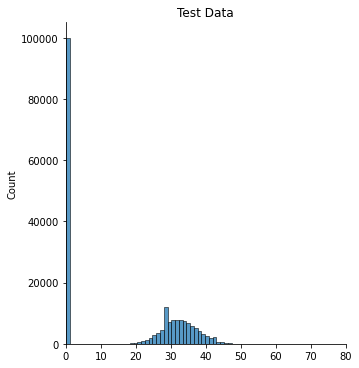

In [17]:
## Unique values distribution
# Test Data
testing= test.drop(['ID_code'], axis=1)
testing = testing.values

unique = []
uniquecount = np.full((200000, 201), 0)

for feature in tqdm(range(testing.shape[1])):
    _, index_, count_ = np.unique(testing[:, feature], return_counts=True, return_index=True)
    uniquecount[index_[count_ == 1], feature] += 1

testunique= pd.DataFrame(data=uniquecount)
a= testunique.agg('sum',axis="columns")

sns.displot(a).set(title='Test Data').set(xlim=(0,80))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


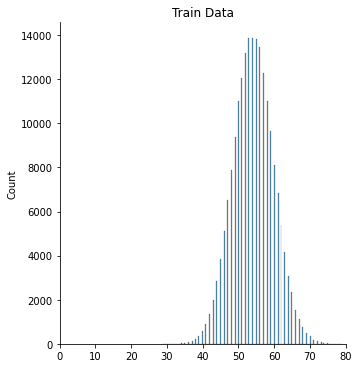

In [18]:
# Train data
training= train.drop(['ID_code','target'], axis=1)
training = training.values

unique = []
uniquecount = np.full((200000, 201), 0)

for feature in tqdm(range(training.shape[1])):
    _, index_, count_ = np.unique(training[:, feature], return_counts=True, return_index=True)
    uniquecount[index_[count_ == 1], feature] += 1

trainunique= pd.DataFrame(data=uniquecount)
a= trainunique.agg('sum',axis="columns")

sns.displot(a).set(title='Train Data').set(xlim=(0,80))

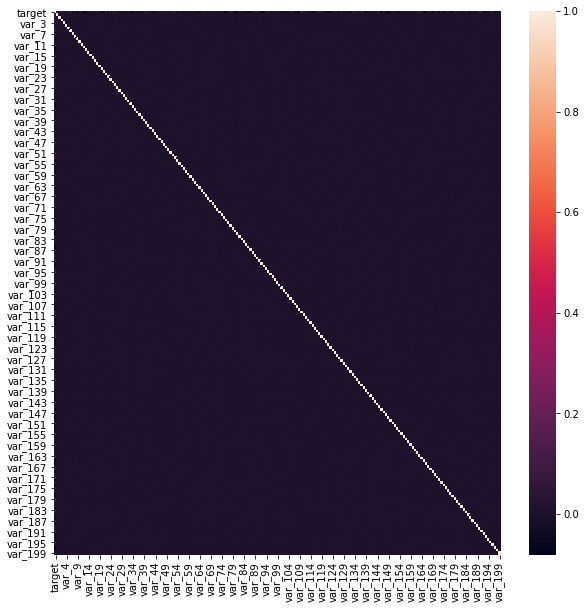

In [19]:
## Correlation analysis of variables for PCA
plt.figure(figsize= (10,10))
sns.heatmap(train.corr())

# Very low to no correlation, independent variables

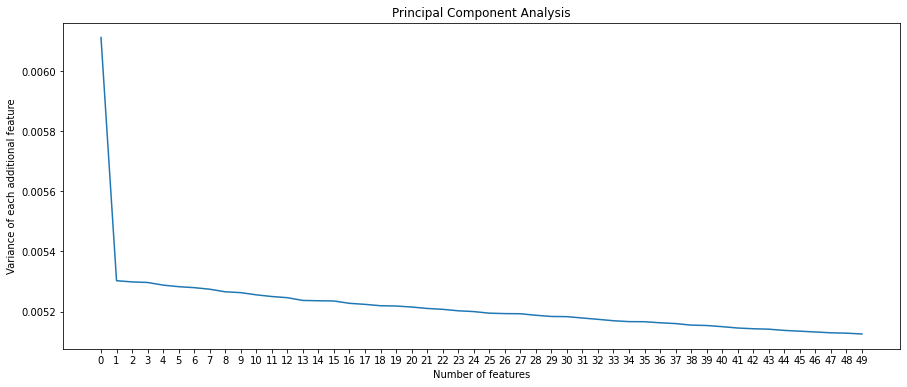

In [ ]:
##PCA
# standardize data
standard= StandardScaler().fit_transform(train.set_index(['ID_code','target']))

# PCA
pca = PCA(n_components=200, random_state=42)
pca.fit(standard)

plt.figure(figsize=(15,6))
plt.plot(pca.explained_variance_ratio_[0:50])
plt.title('Principal Component Analysis')
plt.xticks(range(50))
plt.xlabel('Number of features')
plt.ylabel('Variance of each additional feature')
plt.show()

# Not much gained by reducing features, as each contribute very little variance

In [22]:
##Random Forest feature importance
X = train.iloc[:, 2:]
y = train['target']

# train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# specify classifier
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_clf.fit(X_train, y_train) 

var_0 0.006577453961626683
var_1 0.006315800866197792
var_2 0.00681923976880677
var_3 0.0042973862948137145
var_4 0.004181182021571265
var_5 0.0052264856758855605
var_6 0.008132855838113667
var_7 0.0038838012997088633
var_8 0.003986603956284644
var_9 0.005787413794776023
var_10 0.003839875161218292
var_11 0.004408662103525463
var_12 0.009796521595253167
var_13 0.006836713082319532
var_14 0.0037756126443106667
var_15 0.004247410213334893
var_16 0.00405619977468387
var_17 0.0037296331240593466
var_18 0.005853156262826001
var_19 0.004271456896327954
var_20 0.00433706803494413
var_21 0.006572814117279203
var_22 0.007915706063139124
var_23 0.004389953468700739
var_24 0.004597213237006394
var_25 0.003833912351724915
var_26 0.008139374520900963
var_27 0.0037423189195390297
var_28 0.004499704908713744
var_29 0.003855549163109154
var_30 0.0038826700273000762
var_31 0.0041190262142328325
var_32 0.004684550964321181
var_33 0.006073492556792413
var_34 0.006204773946505639
var_35 0.0048025279699966